In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# **DATA LOADING**

In [2]:
train = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
test = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
movies=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

In [3]:
#Removing Duplicates
movies.head()
print(movies.shape)
movies.drop_duplicates(subset=["movieid"], inplace=True)
print(movies.shape)

(143258, 14)
(126404, 14)


In [4]:
#merging the train dataset with movie dataset
print(train.shape)
train2=pd.merge(train,movies,how="left",on="movieid")
print(train2.shape)

(162758, 5)
(162758, 18)


In [5]:
train2.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


# EDA

In [6]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [7]:
print(train2.isnull().sum())
train2.describe()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64


,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


In [8]:
median_value = train2["audienceScore"].median()
mode_value = train2["audienceScore"].mode()
print(median_value)
print(mode_value)

68.0
0    86.0
Name: audienceScore, dtype: float64


In [9]:
median_value1= train2["runtimeMinutes"].median()
mode_value1 = train2["runtimeMinutes"].mode()
print(median_value1)
print(mode_value1)

104.0
0    90.0
Name: runtimeMinutes, dtype: float64


In [10]:
train2.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

/tmp/ipykernel_21/2934053644.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train2.corr()


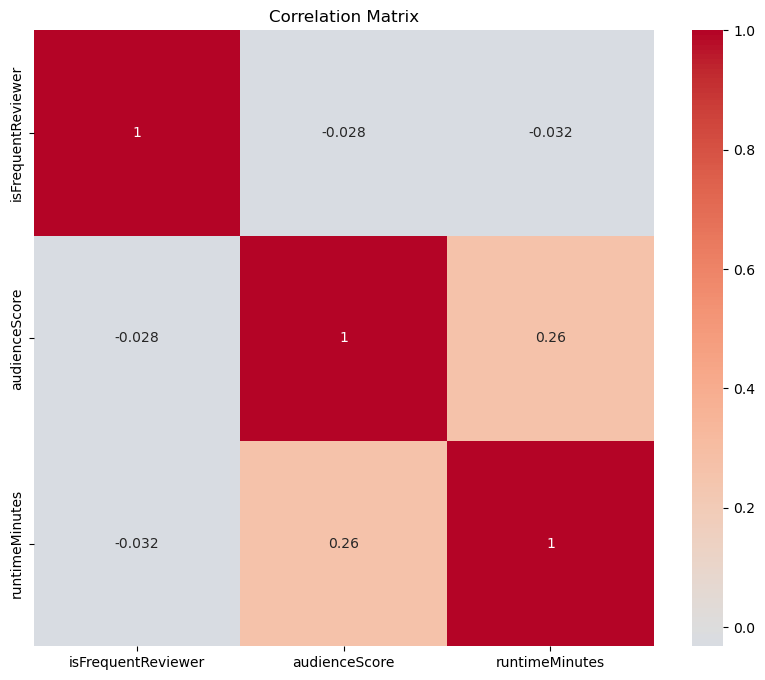

In [11]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = train2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Frequency')

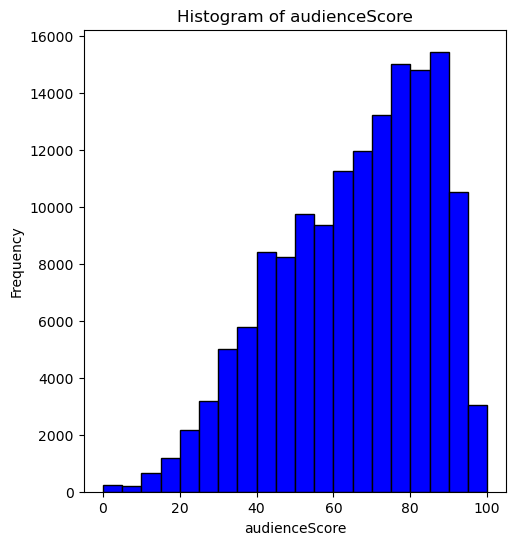

In [12]:
#histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train2['audienceScore'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of audienceScore')
plt.xlabel('audienceScore')
plt.ylabel('Frequency')

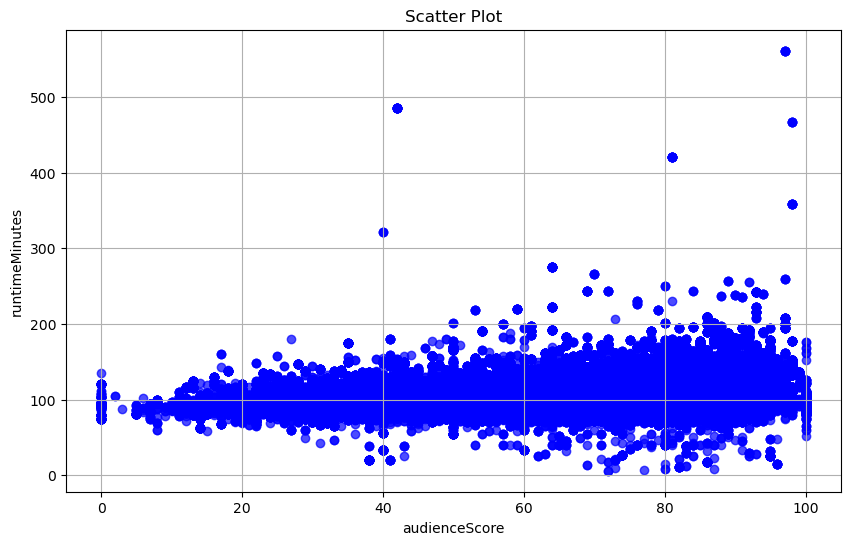

In [13]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train2['audienceScore'], train2['runtimeMinutes'], color='blue', alpha=0.7)
plt.title('Scatter Plot')
plt.xlabel('audienceScore')
plt.ylabel('runtimeMinutes')
plt.grid(True)
plt.show()

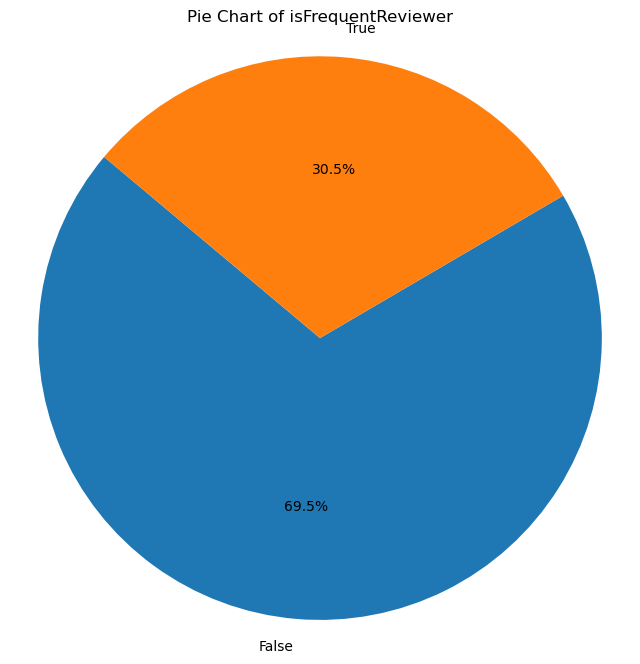

In [14]:
grouped_data = train2['isFrequentReviewer'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of {}'.format('isFrequentReviewer'))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

<Figure size 1000x600 with 0 Axes>

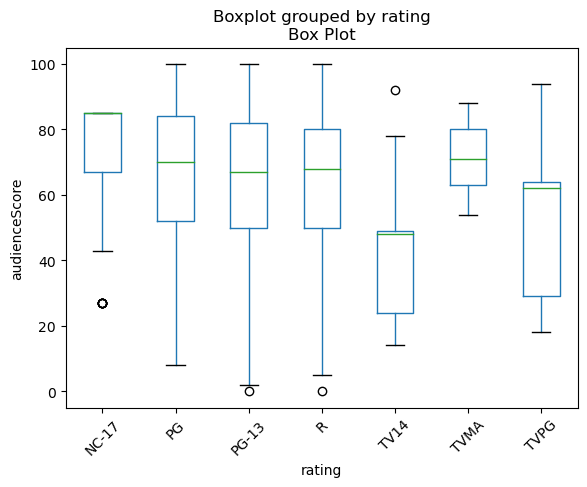

In [15]:
# Create a box plot
plt.figure(figsize=(10, 6))
train2.boxplot(column='audienceScore', by='rating', grid=False)
plt.title('Box Plot')
plt.xlabel('rating')
plt.ylabel('audienceScore')
plt.xticks(rotation=45)
plt.show()

In [16]:
train2["rating"].value_counts()

R        50331
PG-13    36380
PG       11734
NC-17      201
TVPG       200
TV14       146
TVMA        42
Name: rating, dtype: int64

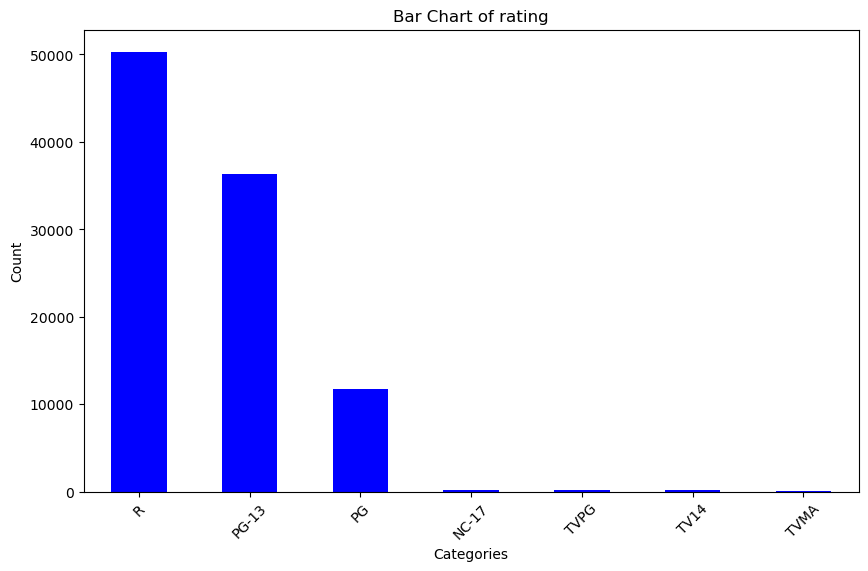

In [17]:
grouped_data = train2['rating'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')
plt.title('Bar Chart of {}'.format('rating'))
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_21/3103744179.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2['audienceScore'], color='g', bins=100, hist_kws={'alpha': 0.4});


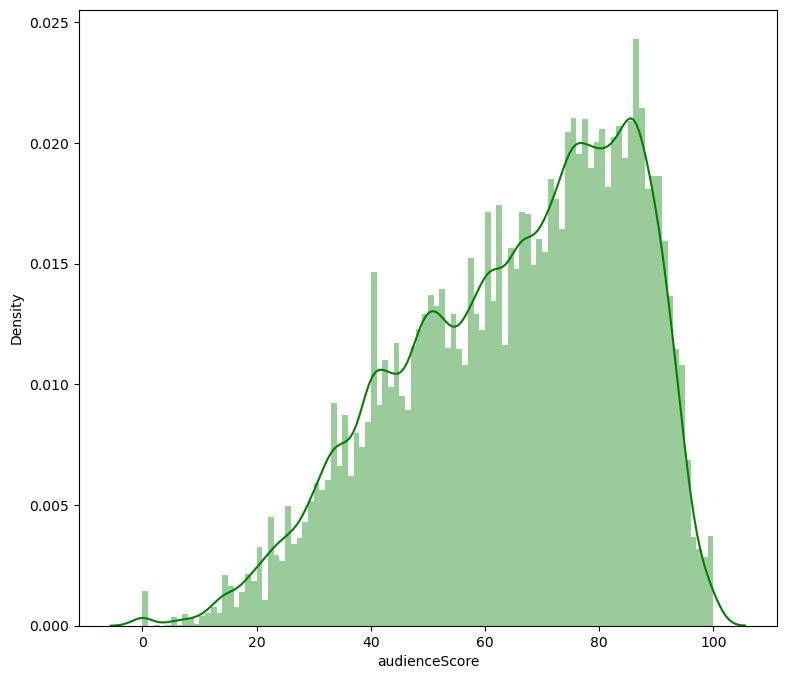

In [18]:
#displot how audience score distributed
plt.figure(figsize=(9, 8))
sns.distplot(train2['audienceScore'], color='g', bins=100, hist_kws={'alpha': 0.4});

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


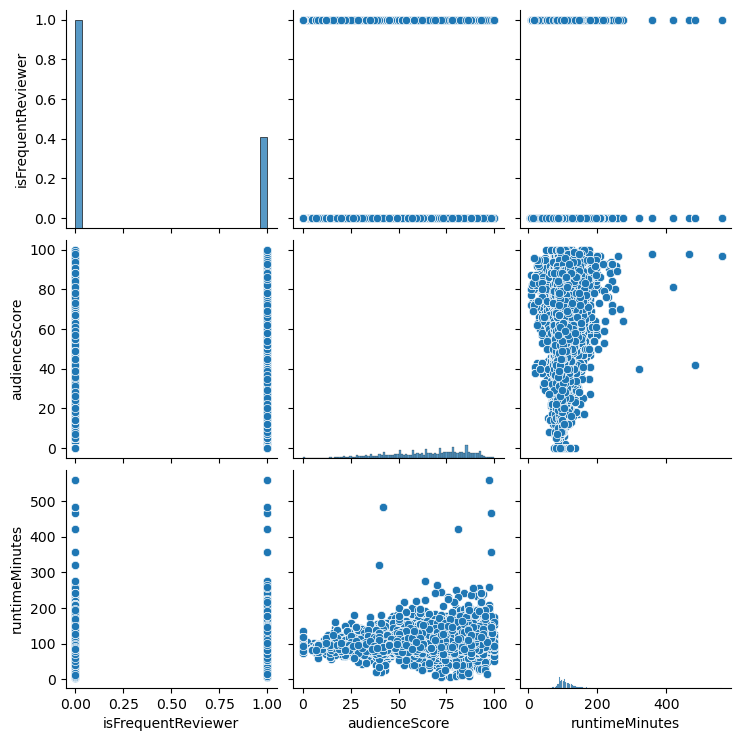

In [19]:
sns.pairplot(train2)
plt.show()

In [20]:
train2["genre"].unique().size

1163

In [21]:
train2["genre"].value_counts()

Drama                                               24159
Comedy                                              11252
Documentary                                          9805
Comedy, Drama                                        9775
Mystery & thriller                                   5012
                                                    ...  
Fantasy, Lgbtq+, Musical                                1
Action, Comedy, Animation                               1
Western, Adventure, Romance                             1
Action, Comedy, Foreign                                 1
Action, Crime, Drama, Horror, Mystery & thriller        1
Name: genre, Length: 1162, dtype: int64

In [22]:
train2["isFrequentReviewer"].value_counts()

False    113189
True      49569
Name: isFrequentReviewer, dtype: int64

In [23]:
train2["originalLanguage"].unique().size

92

In [24]:
train2["movieid"].unique().size

16812

In [25]:
train2["sentiment"].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

# INSIGHTS FROM DATA
Dataset have only 2 numerical variables that are audienceScore and runtimeMinutes it have rating an column which is categorical in nature. There are 16812 movies in 92 different language having different releasing dates, different directors, different box office and other parameters. All these movies are from among the total 1163 type of genres present in the dataset. We have 49569 true FrequentReviewer and 113189 false FrequentReviewer. In last we have Sentiment as a column on which we have to make the prediction which consist 108761 positive and 53997 negative sentiment.

In [26]:
dataset=train2[['movieid','reviewText','audienceScore','rating','isFrequentReviewer','runtimeMinutes','sentiment']]
dataset.head()

,movieid,reviewText,audienceScore,rating,isFrequentReviewer,runtimeMinutes,sentiment
0,marvelous_pirate,Henry Selick’s first movie since 2009’s Corali...,65.0,PG-13,False,105.0,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,With a cast that reads like the Vogue Oscar pa...,NaN,NaN,False,91.0,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Creed II does not give us anything but another...,80.0,PG-13,True,130.0,POSITIVE
3,lara_croft_glimmer,"I know what you're thinking, but this is no Li...",NaN,NaN,False,15.0,POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Director Fernando Meirelles tells the story wi...,97.0,R,False,131.0,POSITIVE


# ****CHECKING AND REPLACING NULL VALUES****

In [27]:
dataset.isnull().sum()

movieid                   0
reviewText             6447
audienceScore         13248
rating                63724
isFrequentReviewer        0
runtimeMinutes         3376
sentiment                 0
dtype: int64

In [28]:
dataset["audienceScore"].fillna(dataset["audienceScore"].mean(),inplace=True)
dataset["runtimeMinutes"].fillna(dataset["runtimeMinutes"].mean(),inplace=True)
dataset["reviewText"].fillna("",inplace=True)

/tmp/ipykernel_21/1265379247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["audienceScore"].fillna(dataset["audienceScore"].mean(),inplace=True)
/tmp/ipykernel_21/1265379247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["runtimeMinutes"].fillna(dataset["runtimeMinutes"].mean(),inplace=True)
/tmp/ipykernel_21/1265379247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["reviewText"].fillna("",inplac

In [29]:
dataset["rating"].unique()

array(['PG-13', nan, 'R', 'PG', 'NC-17', 'TV14', 'TVPG', 'TVMA'],
      dtype=object)

In [30]:
dataset["rating"].fillna(dataset["rating"].mode()[0],inplace=True)

/tmp/ipykernel_21/2724274384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["rating"].fillna(dataset["rating"].mode()[0],inplace=True)


In [31]:
dataset.isnull().sum()

movieid               0
reviewText            0
audienceScore         0
rating                0
isFrequentReviewer    0
runtimeMinutes        0
sentiment             0
dtype: int64

In [32]:
y=dataset["sentiment"]
X=dataset.drop(columns="sentiment",axis=1)

# PIPELINE/COLUMN TRANSFORMER

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer# For Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
pipe=ColumnTransformer([("one_hot_encoder",OneHotEncoder(),["rating"]),
                        ("tfidf_vectorizer",TfidfVectorizer(),"reviewText"),
                        ("count",CountVectorizer(),"movieid"),
                        ("order",OrdinalEncoder(),["isFrequentReviewer"]),
                        ("min_max_scaler",MinMaxScaler(),["runtimeMinutes","audienceScore"])])
X_trans=pipe.fit_transform(X)

**FEATURE ENGINEERING**

In review text column we apply Tfidf vectorizer to convert the text data into the numbers to apply the model and make the prediction on the sentiment weather it is positive or negative

In [34]:
X_trans.shape

(162758, 82380)

**LOGISTIC REGRESION**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg=LogisticRegression()

In [36]:
param_grid={"C":[0.01,0.1,1,10],
           "solver":["liblinear","saga","sag"]}

In [37]:
grid_search=GridSearchCV(log_reg,param_grid,cv=3,verbose=True,n_jobs=-1)

In [38]:
best_grid_search=grid_search.fit(X_trans,y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [39]:
best_grid_search.best_params_

{'C': 1, 'solver': 'liblinear'}

In [40]:
log_reg=LogisticRegression(C=1,solver="liblinear")

In [41]:
best_log_reg=log_reg.fit(X_trans,y)

In [42]:
y_pred=best_log_reg.predict(X_trans)
from sklearn.metrics import *
accuracy_score(y,y_pred)

0.8791395814645055

**LINEAR SVM**

In [43]:
from sklearn.svm import LinearSVC
svc=LinearSVC()

In [44]:
param_grid={"C":[0.01,0.1,1,10],
           "max_iter":[100,500,1000],
           "loss":["hinge","Squared_hinge"]}

In [45]:
grid_search1=GridSearchCV(svc,param_grid,cv=3,n_jobs=-1)

In [46]:
grid_search1.fit(X_trans,y)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'Squared_hinge'],
                         'max_iter': [100, 500, 1000]})

In [47]:
grid_search1.best_params_

{'C': 1, 'loss': 'hinge', 'max_iter': 500}

In [48]:
svc=LinearSVC(C=0.1,max_iter=100,loss="hinge")

In [49]:
best_svc=svc.fit(X_trans,y)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
from sklearn.metrics import *
y_pred1=best_svc.predict(X_trans)
accuracy_score(y,y_pred1)

0.844431610120547

**NAIVE BAYES**

In [51]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()

In [52]:
param_grid={"alpha":[0.1, 0.5, 1.0, 2.0]}

In [53]:
grid_search2=GridSearchCV(naive_bayes,param_grid,cv=3,scoring="accuracy")

In [54]:
grid_search2.fit(X_trans,y)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]}, scoring='accuracy')

In [55]:
best_alpha=grid_search2.best_params_["alpha"]

In [56]:
best_naive_bayes=MultinomialNB(alpha=best_alpha)

In [57]:
best_naive_bayes.fit(X_trans,y)

MultinomialNB(alpha=0.5)

In [58]:
y_pred2=best_naive_bayes.predict(X_trans)
from sklearn.metrics import *
accuracy_score(y,y_pred2)

0.8549564383931972

**KNN ALGORITHM**

In [59]:
'''from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_trans,y)'''

'from sklearn.neighbors import KNeighborsClassifier\nknn=KNeighborsClassifier(n_neighbors=2)\nknn.fit(X_trans,y)'

**RANDOM FOREST CLASSIFIER**

In [60]:
'''from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(random_state=42)'''

'from sklearn.ensemble import RandomForestClassifier\nrf_classifier=RandomForestClassifier(random_state=42)'

In [61]:
'''param_grid = {'n_estimators': [100, 200, 300],      
              'max_depth': [None, 10, 20, 30],      
              'min_samples_split': [2, 5, 10],     
              'min_samples_leaf': [1, 2, 4]}'''

"param_grid = {'n_estimators': [100, 200, 300],      \n              'max_depth': [None, 10, 20, 30],      \n              'min_samples_split': [2, 5, 10],     \n              'min_samples_leaf': [1, 2, 4]}"

In [62]:
'''grid_search3 = GridSearchCV(rf_classifier, param_grid, cv=3, n_jobs=-1)
grid_search3.fit(X_trans,y)'''

'grid_search3 = GridSearchCV(rf_classifier, param_grid, cv=3, n_jobs=-1)\ngrid_search3.fit(X_trans,y)'

# pre-processing on test dataset

In [63]:
print(test.shape)
test2=pd.merge(test,movies,how="left",on="movieid")
print(test2.shape)
print(test2.isnull().sum())

(55315, 4)
(55315, 17)
movieid                     0
reviewerName                0
isTopCritic                 0
reviewText               2510
title                       0
audienceScore            4931
rating                  24296
ratingContents          24296
releaseDateTheaters     13702
releaseDateStreaming     5974
runtimeMinutes           1262
genre                     920
originalLanguage         1238
director                    0
boxOffice               19995
distributor             15596
soundType               30626
dtype: int64


In [64]:
test2.columns

Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText', 'title',
       'audienceScore', 'rating', 'ratingContents', 'releaseDateTheaters',
       'releaseDateStreaming', 'runtimeMinutes', 'genre', 'originalLanguage',
       'director', 'boxOffice', 'distributor', 'soundType'],
      dtype='object')

In [65]:
dataset2=test2[['movieid','isTopCritic','reviewText','audienceScore', 'rating','runtimeMinutes']]

In [66]:
dataset2.isnull().sum()

movieid               0
isTopCritic           0
reviewText         2510
audienceScore      4931
rating            24296
runtimeMinutes     1262
dtype: int64

In [67]:
dataset2["reviewText"].fillna("",inplace=True)

/tmp/ipykernel_21/3970029622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["reviewText"].fillna("",inplace=True)


In [68]:
dataset2["audienceScore"].fillna(dataset2["audienceScore"].mean(),inplace=True)
dataset2["runtimeMinutes"].fillna(dataset2["runtimeMinutes"].mean(),inplace=True)

/tmp/ipykernel_21/1335107352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["audienceScore"].fillna(dataset2["audienceScore"].mean(),inplace=True)
/tmp/ipykernel_21/1335107352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["runtimeMinutes"].fillna(dataset2["runtimeMinutes"].mean(),inplace=True)


In [69]:
dataset2["rating"].fillna(dataset2["rating"].mode()[0],inplace=True)

/tmp/ipykernel_21/2785329578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["rating"].fillna(dataset2["rating"].mode()[0],inplace=True)


In [70]:
dataset2.isnull().sum()

movieid           0
isTopCritic       0
reviewText        0
audienceScore     0
rating            0
runtimeMinutes    0
dtype: int64

**#RENAME isTopCritic to isFrequentReviewer to transform the pipeline on test dataset ****

In [71]:
dataset2.rename(columns={'isTopCritic':'isFrequentReviewer'},inplace=True)

/tmp/ipykernel_21/2527744922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.rename(columns={'isTopCritic':'isFrequentReviewer'},inplace=True)


In [72]:
x_test=pipe.transform(dataset2)

In [73]:
y_prediction1=pd.DataFrame(best_svc.predict(x_test))
y_prediction1.columns=['sentiment']
y_prediction1.index.name='id'
y_prediction1.to_csv('submission.csv')

# INSIGHTS FROM THE MODELS
After performing all the operations on the dataset like EDA,Cheacking and replacing the null values, pre processing the data we apply three models with their hyperparameter tuning and we get follwing accuracy scores from these models 

1>Logistic Regression-83.029%

2>LinearSVM-81.612%

3>Naive Bayes-80.043%